# Lists and stacks in Python

In our previous lecture notes we have used arrays:

1) We decided how many elements we needed

2) We created an array using with ```n``` copies of the value ```init```: ```[init] * n``` 

3) We updated and inspected by *indexing*: ```a[i]```.

Both operations are constant time. 

We mentioned in one of the first lecture notes that we would use arrays and lists as synonyms in Python. In fact, Python allows for more flexible use of the ```[]``` notation than what we have done up to now. We can add elements at any place (not just update values at given positions). Here are some examples. 

> In this section I will write *list* and not *array* because I will use these other operations for adding and removing elements.

The first example with lists is a code fragment that creates a list element by element:

```Python
lst = []
for i in range(10):
    lst = lst + [i]
```

Is this any different from

```Python
a = [0] * 10
for i in range(10):
    a[i] = i
```
?

Maybe not in the result, but yes in the execution time. The operation ```+``` for lists is called append and it is not constant time! It is in fact linear. Which means that the code fragment with the ```for```-loop is quadratic.

The first code fragment creates a list with 0 places. As the ```for```-loop runs, more and more places are added. 

The second code fragment creates a list with 10 places. As the ```for```-loop runs, the values in these places are updated.

So, lets see whether this has consequences for execution time!


In [38]:
def init_lst(n):
    lst = []
    for i in range(n):
        lst = lst + [i]
    return lst


In [39]:
def init_arr(n):
    a = [0] * n
    for i in range(n):
        a[i] = i
    return a

In [40]:
import time
import matplotlib.pyplot as plt

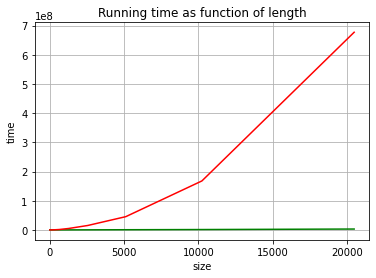

In [41]:
def running_time_data(start_size, p, step, times):
    n = start_size
    results = ([0] * times, [0] * times)
    for i in range(times):
        a = list(range(n))
        start = time.process_time_ns() 
        p(n)
        (results[0][i],results[1][i]) = (n, time.process_time_ns() - start)
        n *= step
    return results

# Use init_arr:
(size_a,t_a) = running_time_data(10,init_arr, 2,12)

# Use init_lst:
(size_l,t_l) = running_time_data(10,init_lst, 2,12)

# Prepare the tool:
_,ax = plt.subplots()

# Plot the points for time for array (green) and time for list (red)
ax.plot(size_a, t_a, color = 'green')
ax.plot(size_l, t_l, color = 'red')

# Decorate the graph:
ax.set(xlabel='size', ylabel='time',
       title='Running time as function of length')

# Add a grid:
ax.grid()

# Display:
plt.show()

Now that you see the difference you can try experiencing it. Try the following code fragment for sizes of 1000, 10000, 100000, 1000000. Or as long as you can ... 

The message ```size done``` should appear quite immediatelly, as well as ```array done```. On the other hand it should soon be apparent that ```list done``` starts to take longer and becomes too slow. In my system, a size of 100000 is already very very slow!

In [32]:
size = 100000
print('size done')
init_arr(size)
print('array done')
init_lst(size)
print('list done')

size done
array done
list done


So, why would we use lists? 

In many programs we do not know how many elements we need to store, moreover, the number of elements might grow and shrink during program execution. We have already been exposed to this when we calculated the independent set of maximum weight: we did not know in advance how many nodes the set would have. In that case we chose a more advanced data structure, a set.

This part of the course is about  data structures that, while growing and shrinking during program execution, behave better than lists in very specific situations.

The purpose of the course it that you get to know that these data structures exist, that you get to know in what situations you should choose to use one of them and that you understand how they contribute to make your program better.

The next chapter is about how to use classes to define these data strustures. We will will only program some of them but you will learn how to use them all, given that they are already implemented in Python. 

And for one of them (stacks) we can just use lists!

# Stacks
Some programs need to retrieve data in the reverse order that it was stored (**Last In First Out**). We call this to *stack* items of data. We could imagine doing this by using a list to add and retrieve elements at the end (we follow the advice in [Using Lists as Stacks](https://docs.python.org/3.10/tutorial/datastructures.html#using-lists-as-stacks)) from the Python documentation. The operations on lists we use are 

```append``` to add an element at the end of the list and 

```pop``` to remove the last element from the list (and return its value).

Doing so we can see the list we create as a pile (or, as we say in computer science, a stack).


In [8]:
s = []

for i in range(10):
    # push by placing at the end:
    s.append(i)
print(s)
print()

for i in range(10):
    # pop, removing from the end
    print('Service first in stack:', s.pop())
    print(s)
    print()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Service first in stack: 9
[0, 1, 2, 3, 4, 5, 6, 7, 8]

Service first in stack: 8
[0, 1, 2, 3, 4, 5, 6, 7]

Service first in stack: 7
[0, 1, 2, 3, 4, 5, 6]

Service first in stack: 6
[0, 1, 2, 3, 4, 5]

Service first in stack: 5
[0, 1, 2, 3, 4]

Service first in stack: 4
[0, 1, 2, 3]

Service first in stack: 3
[0, 1, 2]

Service first in stack: 2
[0, 1]

Service first in stack: 1
[0]

Service first in stack: 0
[]



A standard programming exercise that uses stacks is to check whether parentheses are balanced in a string.

The algorithm scans the string and uses a stack to pile opening parenthesis that are popped when a closing parenthesis is encountered. A closing parenthesis that wasn't opened is detected trying to pop from an empty stack. Open parenthesis that are not closed are detected if the stack is not empty at the end of the scan.

In [29]:
def balanced(text):
    opened = []
    for x in text:
        if   x == '('                   : opened.append('(')
            
        elif x == ')' and opened != []  : opened.pop()
        
        elif x == ')'                   : return False

    return opened == []   

This function is made easy by the choice of data structure! Given that the operations on stack are constant time the execution time of ```balanced``` is linear!

Observe also that we use a ```for```-loop that instead of iterating through the indices of the string, iterates directly through the elements of the string!

## Exercise

Program a new version of list initialisation (```init_stack```) that uses ```append``` (you need to be careful because ```append``` is a command and not an expression).

Add it to the execution time visualisation code.  What do you observe?